In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[# **Topic 1: Airline Customer Satisfaction**](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)


Analyzing Inflight wifi service:

Mean Inflight wifi service Score: 2.73
95% Confidence Interval: (2.7216093442944578, 2.737756993863842)


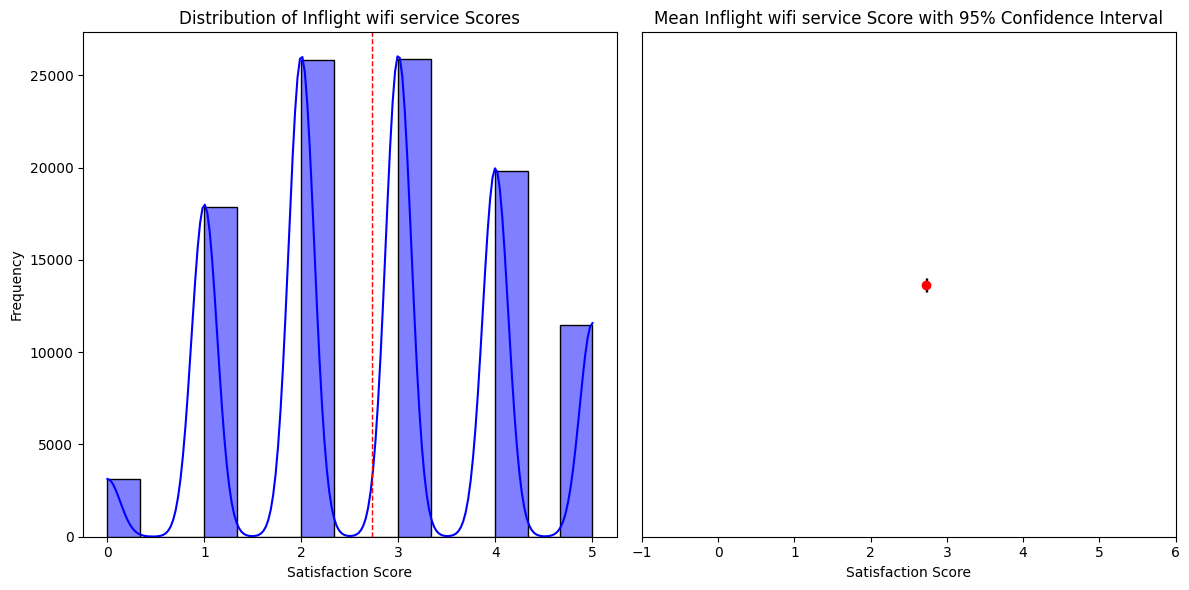


Analyzing Food and drink:

Mean Food and drink Score: 3.20
95% Confidence Interval: (3.1940447069255615, 3.210213069483431)


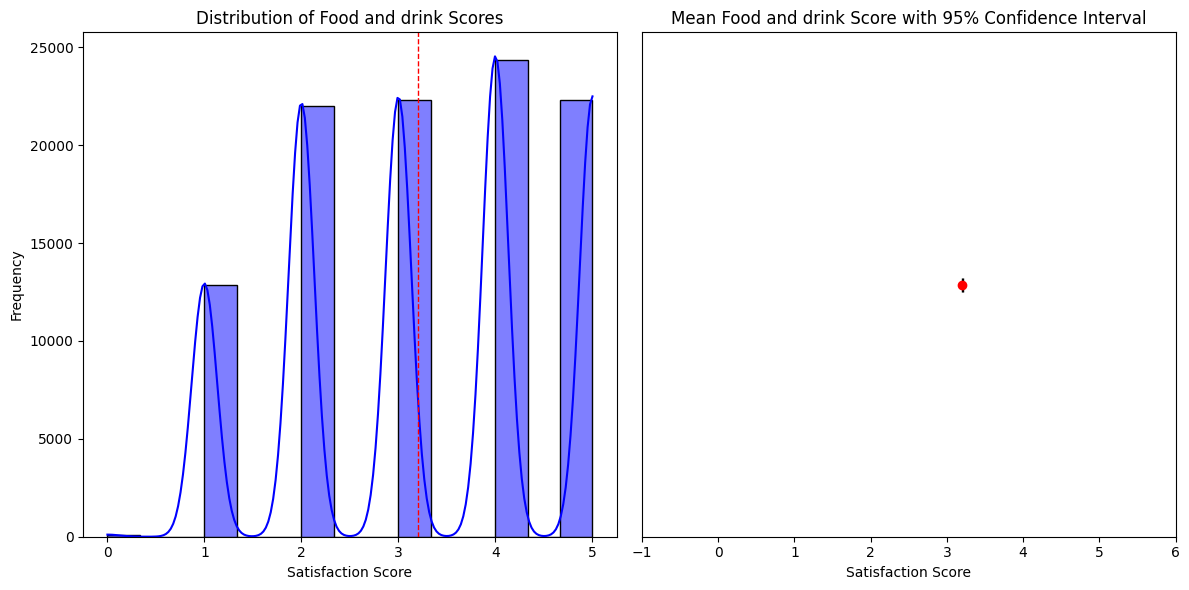


Analyzing On-board service:

Mean On-board service Score: 3.38
95% Confidence Interval: (3.374528767810733, 3.390196363079319)


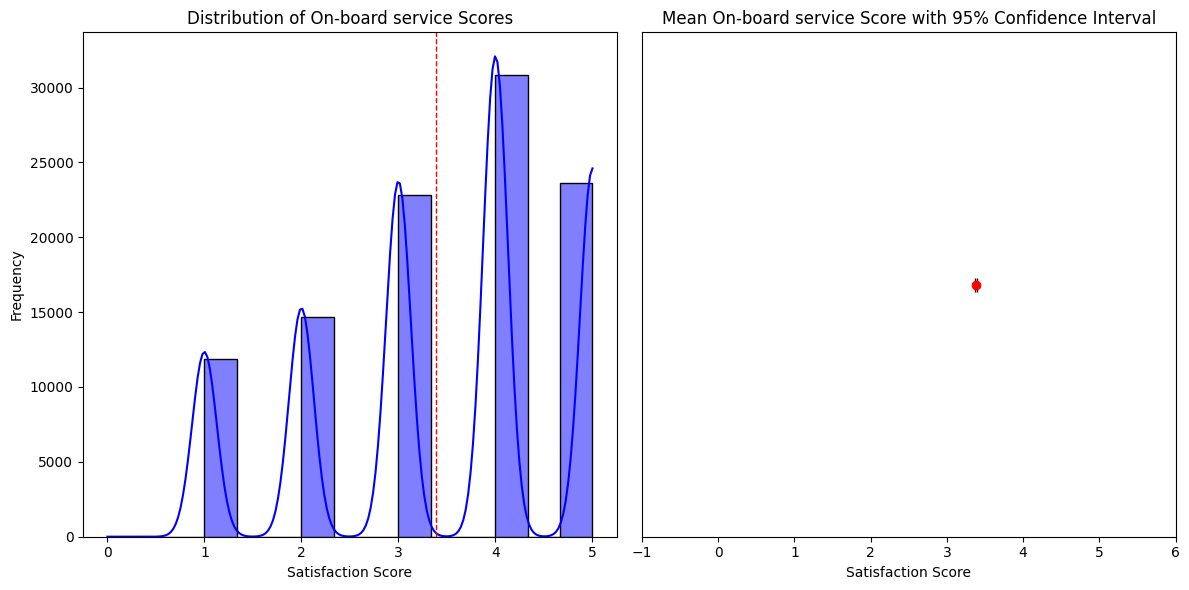


Analyzing Cleanliness:

Mean Cleanliness Score: 3.29
95% Confidence Interval: (3.2783716291072773, 3.294330095561648)


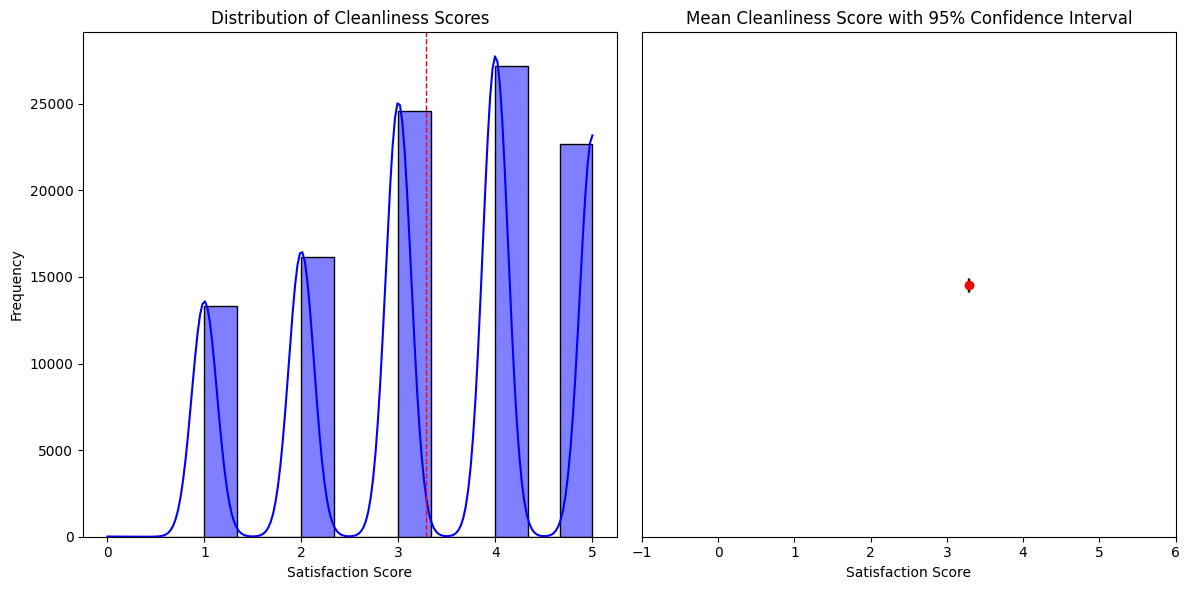


Analyzing Seat comfort:

Mean Seat comfort Score: 3.44
95% Confidence Interval: (3.4313753112850707, 3.447416650525832)


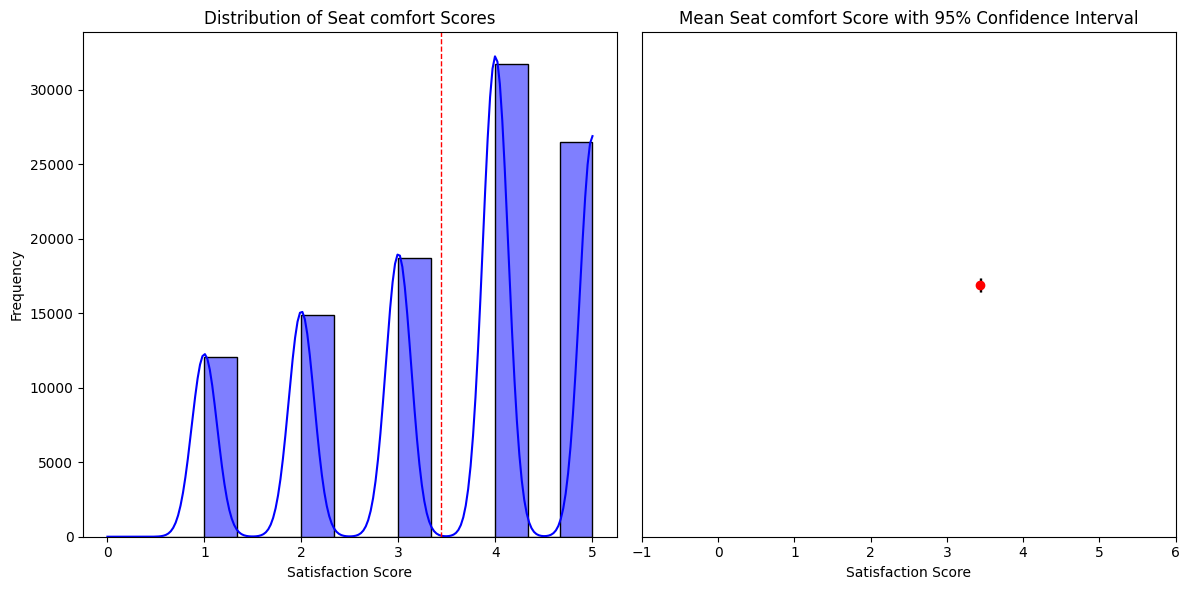


Summary of Results:
Inflight wifi service: Mean = 2.73, 95% CI = (2.7216093442944578, 2.737756993863842)
Food and drink: Mean = 3.20, 95% CI = (3.1940447069255615, 3.210213069483431)
On-board service: Mean = 3.38, 95% CI = (3.374528767810733, 3.390196363079319)
Cleanliness: Mean = 3.29, 95% CI = (3.2783716291072773, 3.294330095561648)
Seat comfort: Mean = 3.44, 95% CI = (3.4313753112850707, 3.447416650525832)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the dataset
file_path = 'drive/My Drive/ASM/train.csv'
data = pd.read_csv(file_path)

# Satisfaction columns to analyze
satisfaction_columns = ['Inflight wifi service', 'Food and drink', 'On-board service', 'Cleanliness', 'Seat comfort']

# Step 2-4: Function to calculate and visualize mean, confidence interval, and distribution
def analyze_satisfaction(data, column):
    # Calculate the mean and standard error
    mean_score = data[column].mean()
    std_dev = data[column].std(ddof=1)
    sample_size = len(data[column].dropna())
    standard_error = std_dev / np.sqrt(sample_size)

    # Constructing the 95% confidence interval
    confidence_level = 0.95
    degrees_freedom = sample_size - 1
    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_score, standard_error)

    print(f"Mean {column} Score: {mean_score:.2f}")
    print(f"95% Confidence Interval: {confidence_interval}")

    # Visualizing the data
    plt.figure(figsize=(12, 6))

    # Histogram of satisfaction scores
    plt.subplot(1, 2, 1)
    sns.histplot(data[column].dropna(), kde=True, color='blue', bins=15)
    plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)
    plt.title(f'Distribution of {column} Scores')
    plt.xlabel('Satisfaction Score')
    plt.ylabel('Frequency')

    # Plotting the mean and confidence interval
    plt.subplot(1, 2, 2)
    plt.errorbar(x=mean_score, y=0, xerr=(confidence_interval[1] - mean_score), fmt='o', color='red', ecolor='black', capsize=5)
    plt.xlim(min(data[column].dropna()) - 1, max(data[column].dropna()) + 1)
    plt.title(f'Mean {column} Score with 95% Confidence Interval')
    plt.xlabel('Satisfaction Score')
    plt.yticks([])  # Hide y-axis ticks

    plt.tight_layout()
    plt.show()

    return mean_score, confidence_interval

# Analyzing each satisfaction column
results = {}
for column in satisfaction_columns:
    print(f"\nAnalyzing {column}:\n")
    mean_score, confidence_interval = analyze_satisfaction(data, column)
    results[column] = (mean_score, confidence_interval)

# Display summary of results
print("\nSummary of Results:")
for column, (mean_score, confidence_interval) in results.items():
    print(f"{column}: Mean = {mean_score:.2f}, 95% CI = {confidence_interval}")



 [# **Topic 2: Maharashtra 2019 Election Results**](https://www.kaggle.com/datasets/ichhadhari/maharashtra-ac-2019-election-result)

Observed Frequencies: {'Bharatiya Janta Party': 105, 'Shiv Sena': 56, 'Nationalist Congress Party': 54, 'Indian National Congress': 44, 'Independent': 13, 'Bahujan Vikas Aaghadi': 3, 'All India Majlis-E-Ittehadul Muslimeen': 2, 'Prahar Janshakti Party ': 2, 'Samajwadi Party': 2, 'Swabhimani Paksha': 1, 'Peasants And Workers Party Of India': 1, 'Rashtriya Samaj Paksha': 1, 'Communist Party Of India (Marxist)': 1, 'Maharashtra Navnirman Sena': 1, 'Krantikari Shetkari Party': 1, 'Jan Surajya Shakti': 1}
Expected Frequencies: {'Bharatiya Janta Party': 150.0, 'Shiv Sena': 62.0, 'Nationalist Congress Party': 26.0, 'Indian National Congress': 35.0, 'Independent': 4.0, 'Bahujan Vikas Aaghadi': 1.0, 'All India Majlis-E-Ittehadul Muslimeen': 1.0, 'Prahar Janshakti Party ': 1.0, 'Samajwadi Party': 1.0, 'Swabhimani Paksha': 1.0, 'Peasants And Workers Party Of India': 1.0, 'Rashtriya Samaj Paksha': 1.0, 'Communist Party Of India (Marxist)': 1.0, 'Maharashtra Navnirman Sena': 1.0, 'Krantikari Shetka

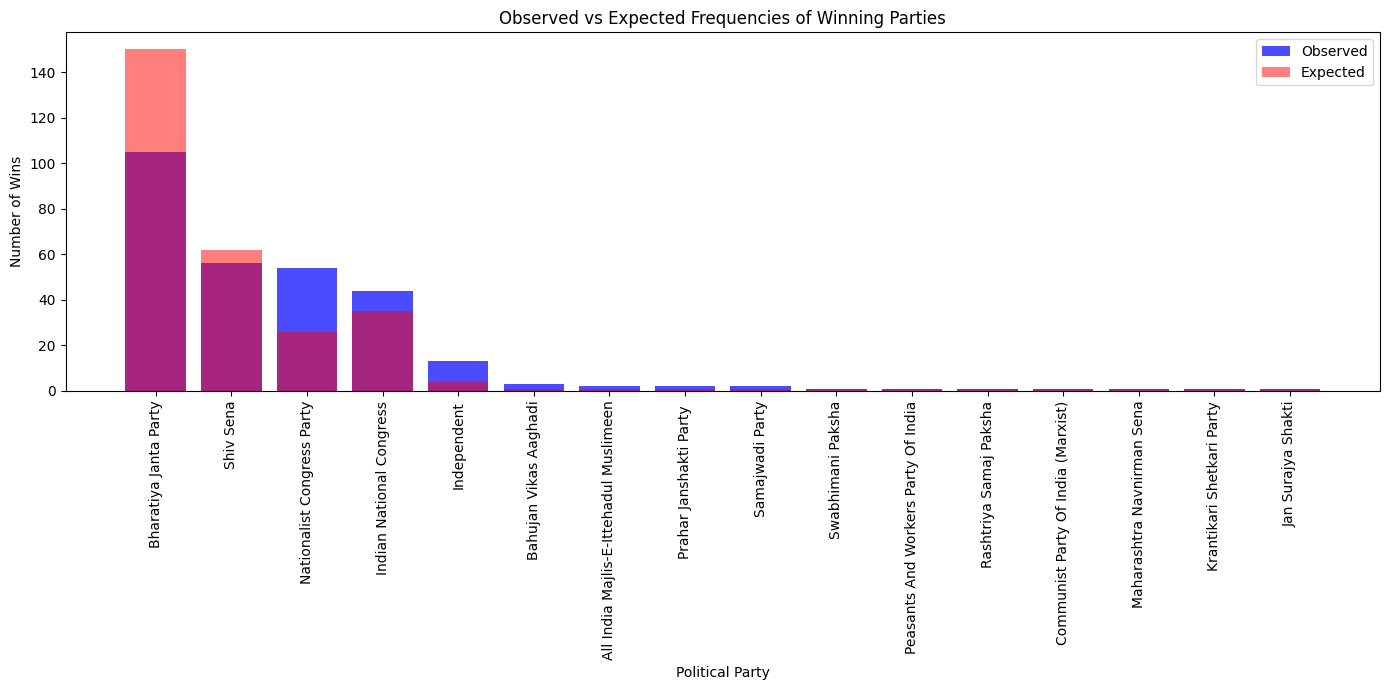

In [ ]:
import pandas as pd
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'drive/My Drive/ASM/maharastra-AC-2019.xlsx'
data = pd.read_excel(file_path)

# Step 2: Count the observed frequencies of each political party
observed_frequencies = data['Party'].value_counts()
observed_frequencies_dict = observed_frequencies.to_dict()

# Step 3: Define the expected distribution
#based on exit polls: Poll of Polls
expected_frequencies = {
    'Bharatiya Janta Party': 150,
    'Shiv Sena': 62,
    'Nationalist Congress Party': 26,
    'Indian National Congress': 35,
    'Independent': 4,
    'Bahujan Vikas Aaghadi': 1,
    'All India Majlis-E-Ittehadul Muslimeen': 1,
    'Prahar Janshakti Party ': 1,
    'Samajwadi Party': 1,
    'Swabhimani Paksha': 1,
    'Peasants And Workers Party Of India': 1,
    'Rashtriya Samaj Paksha': 1,
    'Communist Party Of India (Marxist)': 1,
    'Maharashtra Navnirman Sena': 1,
    'Krantikari Shetkari Party': 1,
    'Jan Surajya Shakti': 1
}

# Normalize the expected frequencies to match the sum of observed frequencies
observed_sum = sum(observed_frequencies)
expected_sum = sum(expected_frequencies.values())
normalized_expected_frequencies = {party: (freq / expected_sum) * observed_sum for party, freq in expected_frequencies.items()}

# Convert to lists for the chi-square test
observed = list(observed_frequencies_dict.values())
expected = [normalized_expected_frequencies[party] for party in observed_frequencies.index]

# Step 4: Perform the multinomial goodness of fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Observed Frequencies:", observed_frequencies_dict)
print("Expected Frequencies:", normalized_expected_frequencies)
print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Step 5: Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The observed distribution of parties does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution of parties matches the expected distribution.")

# Optional: Visualization
# Bar chart for observed frequencies
plt.figure(figsize=(14, 7))
plt.bar(observed_frequencies.index, observed_frequencies.values, color='blue', alpha=0.7, label='Observed')

# Bar chart for normalized expected frequencies
plt.bar(list(normalized_expected_frequencies.keys()), list(normalized_expected_frequencies.values()), color='red', alpha=0.5, label='Expected')

plt.xlabel('Political Party')
plt.ylabel('Number of Wins')
plt.title('Observed vs Expected Frequencies of Winning Parties')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
# Example: Define custom expected frequencies based on historical data
expected_frequencies = {
    'Bharatiya Janta Party': 90,
    'Shiv Sena': 70,
    'Nationalist Congress Party': 50,
    'Indian National Congress': 45,
    'Independent': 15,
    'Bahujan Vikas Aaghadi': 5,
    'All India Majlis-E-Ittehadul Muslimeen': 2,
    'Prahar Janshakti Party ': 2,
    'Samajwadi Party': 2,
    'Swabhimani Paksha': 2,
    'Peasants And Workers Party Of India': 2,
    'Rashtriya Samaj Paksha': 2,
    'Communist Party Of India (Marxist)': 1,
    'Maharashtra Navnirman Sena': 1,
    'Krantikari Shetkari Party': 1,
    'Jan Surajya Shakti': 1
}

# Convert to lists for the chi-square test
observed = list(observed_frequencies_dict.values())
expected = [expected_frequencies[party] for party in observed_frequencies.index]

# Step 4 and 5 remain the same as above
